In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


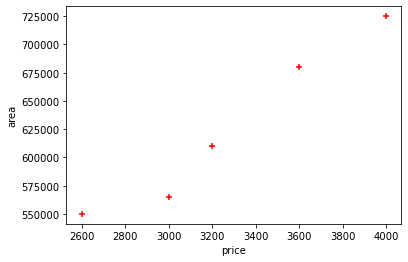

In [16]:
plt.xlabel("price")
plt.ylabel("area")
x=df.area
y=df.price
plt.scatter(x,y,color="r",marker="+")

In [27]:
df=df.drop('price', axis='columns')
df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [28]:
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(df, y)

<IPython.core.display.Javascript object>

LinearRegression()

### (1) Predict price of a home with area = 3300 sqr ft

In [33]:
lin_reg.predict([[3300]])

array([628715.75342466])

In [42]:
print("\nx = 3300\nm = ", lin_reg.coef_, "\nc= ",lin_reg.intercept_ ,"\ny = mx+ c = ",3300*135.78767123 + 180616.43835616432)


x = 3300
m =  [135.78767123] 
c=  180616.43835616432 
y = mx+ c =  628715.7534151643


### Generate CSV file with list of home price predictions

In [44]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [46]:
p = lin_reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [52]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [53]:
area_df.to_csv("prediction.csv")